In [105]:
## Data Preprocessing

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Read data_train
train_set = np.loadtxt('data_train_oct.csv', skiprows=1, delimiter=',')

# Get speed data (kph) for regular, AM peak, PM peak
speed_regular = train_set[:,0]
speed_AMpeak = train_set[:,3]
speed_PMpeak = train_set[:,5]

# Get distance data (km) for regular, AM peak, PM peak
# x: input parameter
dist_regular = train_set[:,2] * 75 - 1000
dist_AMpeak = train_set[:,4] * 300
dist_PMpeak = train_set[:,6] * 500

# Calculate travel time data (minutes) for regular, AM peak, PM peak
# y: ground truth
time_regular = dist_regular / speed_regular * 0.05
time_AMpeak = dist_AMpeak / speed_AMpeak * 0.07
time_PMpeak = dist_PMpeak / speed_PMpeak * 0.07

def gkernel(x, b, x_data, y_data):
    xx = x - x_data
    K = (1/((np.sqrt(2*np.pi))))*np.exp(-0.5 *(xx/b)**2)
    while np.all(K==0):
        b = b*10
        K = (1/((np.sqrt(2*np.pi))))*np.exp(-0.5 *(xx/b)**2)
    Ksum = np.sum(K)
    weight = K/Ksum
    yk = sum(weight*y_data)
    xkyk = np.array([[x], [yk]])
    return ykernel, xkyk

In [ ]:
## Preprocess Commuter Input
stations = np.loadtxt('data_stations.csv', skiprows=1, delimiter=',')
data_dist = stations[:,1]

in_start = 0 #Monumento
in_stop = 4 #Roosevelt

if in_start <= in_stop: #southbound
    xesti = np.sum(data_dist[in_start:in_stop]) 
else: #northbound
    xesti = np.sum(data_dist[in_stop:in_start])

print("Distance: ", xesti)

In [107]:
## Output Printing

xesti = 7950
ykernel = np.array([[],[]])

b = 500
ykernel, xkyk = gkernel(xesti, b, dist_PMpeak, time_PMpeak)
print(xkyk)

[[7950.        ]
 [  39.97267488]]


<function matplotlib.pyplot.show(close=None, block=None)>

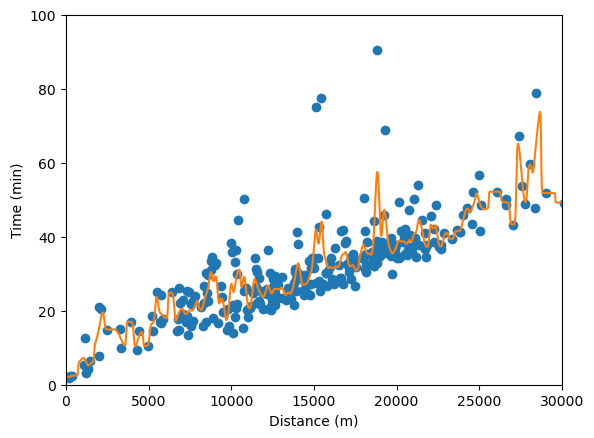

In [78]:
## Regular Period

b = 100 #bandwidth
kdeEstimateyX = np.arange(0, 30000, 10)
ykernel = np.array([[],[]])

for xesti in kdeEstimateyX:
    ykernel, xkyk = gkernel(xesti, b, dist_regular, time_regular)
    ykernel = np.append(ykernel,xkyk, axis=1)

## Plotting

plt.plot(dist_regular, time_regular, 'o')
plt.plot(ykernel[0], ykernel[1])

plt.xlabel("Distance (m)") # in meters
plt.ylabel("Time (min)") # in minutes

plt.xlim(0,30000)
plt.ylim(0,100)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

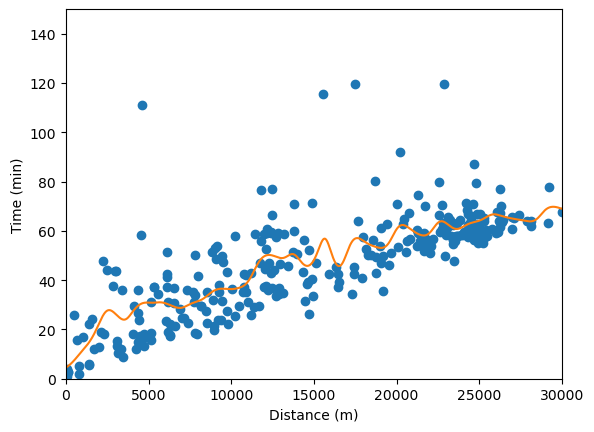

In [74]:
## AM Peak Period

b = 500 #bandwidth
kdeEstimateyX = np.arange(0, 30000, 10)
ykernel = np.array([[],[]])

for xesti in kdeEstimateyX:
    ykernel, xkyk = gkernel(xesti, b, dist_AMpeak, time_AMpeak)
    ykernel = np.append(ykernel,xkyk, axis=1)

## Plotting

plt.plot(dist_AMpeak, time_AMpeak, 'o')
plt.plot(ykernel[0], ykernel[1])

plt.xlabel("Distance (m)") # in meters
plt.ylabel("Time (min)") # in minutes

plt.xlim(0,30000)
plt.ylim(0,150)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

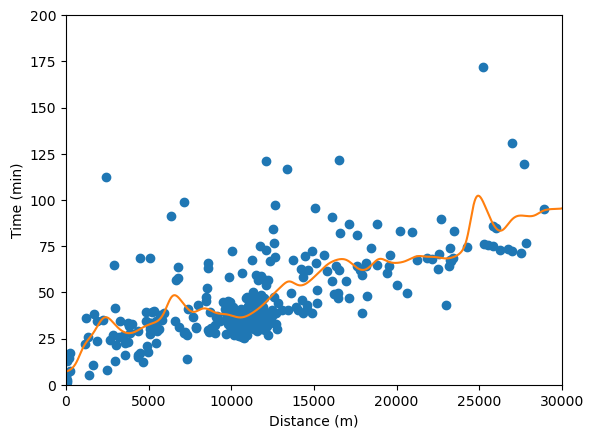

In [106]:
## PM Peak Period

b = 500 #bandwidth
kdeEstimateyX = np.arange(0, 30000, 10)
ykernel = np.array([[],[]])

for xesti in kdeEstimateyX:
    ykernel, xkyk = gkernel(xesti, b, dist_PMpeak, time_PMpeak)
    ykernel = np.append(ykernel,xkyk, axis=1)

## Plotting

plt.plot(dist_PMpeak, time_PMpeak, 'o')
plt.plot(ykernel[0], ykernel[1])

plt.xlabel("Distance (m)") # in meters
plt.ylabel("Time (min)") # in minutes

plt.xlim(0,30000)
plt.ylim(0,200)

plt.show